In [15]:
from numpy import *
import operator
import matplotlib.pyplot as plt
import pandas as pd
from numpy.linalg import *
from rerf.urerf import UnsupervisedRandomForest
from sklearn.preprocessing import StandardScaler

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
# Only the X variables
data = df[['sepal length','sepal width','petal length','petal width']]

features = ['sepal length', 'sepal width', 'petal length', 'petal width']

#applying USPORF
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values

clf = UnsupervisedRandomForest(feature_combinations='auto', max_depth=None,
                         max_features='auto', min_samples_split='auto',
                         n_estimators=1000, n_jobs=None,
                         projection_matrix='RerF', random_state=0)

clf.fit(x)
sim_mat = clf.transform()
print(sim_mat)
#plt.imshow(sim_mat)

#calculate SVD
n = 2 # We will take two Singular Values
U, s, V = linalg.svd(sim_mat)
# eye() creates a matrix with ones on the diagonal and zeros elsewhere
Sig = mat(eye(n)*s[:n])
newdata = U[:,:n]
newdata = pd.DataFrame(newdata)
newdata.columns=['SVD1','SVD2']
newdata.head()

[[1.    0.076 0.077 ... 0.    0.    0.   ]
 [0.082 1.    0.191 ... 0.002 0.    0.002]
 [0.072 0.171 1.    ... 0.    0.    0.   ]
 ...
 [0.    0.003 0.    ... 1.    0.061 0.11 ]
 [0.    0.    0.    ... 0.055 1.    0.016]
 [0.    0.004 0.    ... 0.123 0.023 1.   ]]


,SVD1,SVD2
0,-0.175210,0.020759
1,-0.182214,0.018173
2,-0.170395,0.019164
3,-0.169917,0.018260
4,-0.165230,0.019415


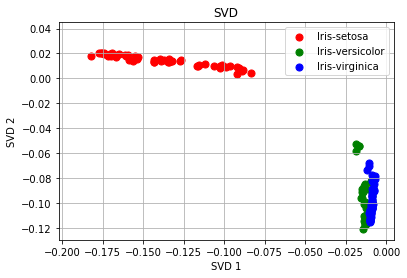

In [16]:
newdata['target']=df['target']

fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('SVD 1') 
ax.set_ylabel('SVD 2') 
ax.set_title('SVD') 
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
 indicesToKeep = newdata['target'] == target
 ax.scatter(newdata.loc[indicesToKeep, 'SVD1']
 , newdata.loc[indicesToKeep, 'SVD2']
 , c = color
 , s = 50)
ax.legend(targets)
ax.grid()